<a href="https://colab.research.google.com/github/zza0818/py-11/blob/master/wk09_py_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 12-01
## numpy, pandas, matplotlib



*   numpy : 파이썬의 수학적인 구조를 담당하는 모듈
*   pandas : 데이터를 다루는 클래스와 모듈들이 모여있음, Dataframe이라는 구조 지원,  R과 유사
*  matplotlib : Graphic Module



    +) Tensorflow도 최근에 추가되었음

### NumPy를 사용한다

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving reactions.txt to reactions.txt
User uploaded file "reactions.txt" with length 26000 bytes


In [2]:
ls # UNIX 명령어로, list를 의미함 # 현재 내가 있는 작업공간에 무엇이 존재하는지 확인

bookmark.py  __pycache__/  reactions.txt  sample_data/  testmodule.py


In [0]:
# 파일로부터 데이터를 읽어 들임
# 반응 테스트의 실험 데이터를 읽어 들임
import numpy as np       # numpy을 임포트 # numpy는 기니까 np로 더 짧게 축약
# 파일에서 데이터를 읽어 들임 (colab에서 읽어보시오.)
reactions_in_ms = np.loadtxt('reactions.txt') # 텍스트 파일을 읽어오는 함수 # 자동으로 numpy의 vector 구조로 저장

In [4]:
# NumPy의 array를 사용한다.
# 데이터 요약 보기
print(reactions_in_ms.size)       # 요소 수를 표시
print(reactions_in_ms[:20])       # 앞에서부터 20개 요소를 표시 # 1000줄이 포함되어 있음 # 인덱싱을 사용해 # 처음부터 20개의 데이터를 보여줌

1000
[664. 481. 511. 612. 526. 498. 441. 447. 685. 477. 525. 686. 685. 485.
 525. 704. 631. 464. 576. 514.]


In [5]:
# array( ) 나눗셈
# 밀리초(ms)를 초(s)로 고침
reactions_in_sec = reactions_in_ms/1000
print(reactions_in_sec[:20])            # 앞에서부터 20개 요소를 표시

[0.664 0.481 0.511 0.612 0.526 0.498 0.441 0.447 0.685 0.477 0.525 0.686
 0.685 0.485 0.525 0.704 0.631 0.464 0.576 0.514]


In [6]:
# ms

# NumPy의 여러 가지 함수
# 기본 통계를 표시하고 데이터의 요약을 검토
print("평균값 :", np.mean(reactions_in_sec)) 
print("중앙값 :", np.median(reactions_in_sec)) # 크기대로 쭉 정렬시켰을 때 중앙에 있는 값들의 평균 # 1000개라면 50.51번 째 값의 평균
print("표준편차 :", np.std(reactions_in_sec))
print("최솟값 :", np.min(reactions_in_sec))
print("최대값 :", np.max(reactions_in_sec))

평균값 : 0.492834
중앙값 : 0.478
표준편차 : 0.10190053210852237
최솟값 : 0.251
최대값 : 0.843


## pandas

- 파이썬에서 데이터를 처리하는 모듈 (R과 유사함)

In [7]:
# 복잡한 데이터를 체계적으로 담아서 관리하고 처리하는 구조 : DataFrame
# pandas의 DataFrame형을 사용한다 
import pandas as pd # 주로 pd로 축약
reactions_df = pd.DataFrame(reactions_in_sec) # , columns=['react_sec']) # DataFrame 이라는 클래스를 사용 
reactions_df.head()       # 데이터의 개요를 표시 # 현재 데이터 중에서 5개나 6개만 추출,  tail을 사용하면 현재 데이터 중에서 뒷부분의 5개나 6개만 추출

,0
0,0.664
1,0.481
2,0.511
3,0.612
4,0.526


In [8]:
reactions_df.describe()

,0
count,1000.000000
mean,0.492834
std,0.101952
min,0.251000
25%,0.417000
50%,0.478000
75%,0.559000
max,0.843000


In [9]:
reactions_df.columns # colum은 현재 하나밖에 없어! # 위에서 colums 정의 해줬어 # 안 해주면 숫자로 떠(0)

RangeIndex(start=0, stop=1, step=1)

*   colums 정의 코드



In [0]:
# 복잡한 데이터를 체계적으로 담아서 관리하고 처리하는 구조 : DataFrame
# pandas의 DataFrame형을 사용한다 
import pandas as pd # 주로 pd로 축약
reactions_df = pd.DataFrame(reactions_in_sec, columns=['react_sec']) # DataFrame 이라는 클래스를 사용 # colums 정의
reactions_df.head()       # 데이터의 개요를 표시 # 현재 데이터 중에서 5개나 6개만 추출,  tail을 사용하면 현재 데이터 중에서 뒷부분의 5개나 6개만 추출

,react_sec
0,0.664
1,0.481
2,0.511
3,0.612
4,0.526


In [0]:
reactions_df.describe()   # 데이터의 평균, 표준 편차, 최댓값, 최솟값 등을 표시 # 데이터 안에 들어있는 값들의 분포 특성을 나타냄 # 50% = median

,react_sec
count,1000.000000
mean,0.492834
std,0.101952
min,0.251000
25%,0.417000
50%,0.478000
75%,0.559000
max,0.843000


In [0]:
reactions_df.columns # colum은 현재 하나밖에 없어! # 위에서 colums 정의 해줬어 # 안 해주면 숫자로 떠(0)

Index(['react_sec'], dtype='object')

### matplotlib를 사용한다

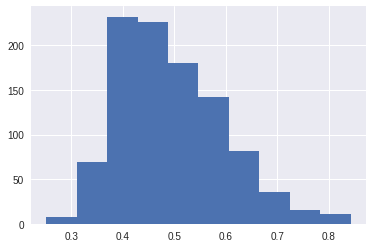

In [10]:
# matplotlib으로 히스토그램을 그린다
%matplotlib inline
import matplotlib.pyplot as plt # matplotlib를 임포트 # 주로 plt로 축약
h = plt.hist(reactions_in_sec)  # 히스토그램을 그림

# Add title and axis names
# plt.title('reaction time in sec')
# plt.xlabel('sec')
# plt.ylabel('frequency')
# plt.show()



*   title, xlabel, ylabel 정의 코드



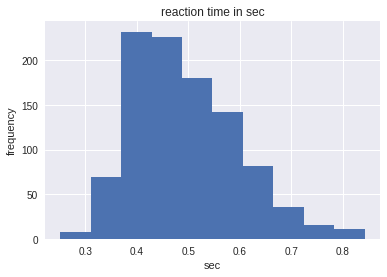

In [11]:
# matplotlib으로 히스토그램을 그린다
%matplotlib inline
import matplotlib.pyplot as plt # matplotlib를 임포트 # 주로 plt로 축약
h = plt.hist(reactions_in_sec)  # 히스토그램을 그림

# Add title and axis names
plt.title('reaction time in sec')
plt.xlabel('sec')
plt.ylabel('frequency')
plt.show()

***

# Chapter 12-02
## NumPy를 사용한다

### NumPy의 array를 생성한다

*   array와 비슷한 것 : list
*   list는 수학적으로 엄격하지 않지만, array는 수학적으로 엄격함

In [12]:
# array의 작성
import numpy as np         # NumPy를 임포트
a = np.array([0, 1, 2, 3]) # array를 만듦
a                          # array를 표시

array([0, 1, 2, 3])

In [13]:
# 2차원 array의 작성
b = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]]) # 말은 없지만, 구조를 보고 몇차원인지 확인
b

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [14]:
# array의 속성(property)
print(b.ndim)       # 차원 수 # 1차원 배열은 1, 2차원 배열은 2
print(b.shape)      # 각 차원의 요소 수 # 배열의 구조 n by n 구조 # 위의 코드는 3 by 3
print(b.size)       # 크기 # 위의 코드는 9
print(b.dtype)      # 형 # 데이터 타입 # 위의 코드는 정수(int)

2
(3, 3)
9
int64


In [15]:
a.ndim, a.shape, a.size # 1차원 배열

#(4,) 잘 이해! -> (1,4)와 어떻게 다른지? 4 by 1이라는 뜻 
# 기본적으로 numpy는 행 백터를 일반적으로 가로로 바꿔서 나타낸다.

(1, (4,), 4)

In [16]:
# 2차원 배열로 변환한다
# reshape()로 array로 변경
b2 = np.zeros(9).reshape(3, 3) # reshape : numpy안에 있는 내부 메소드 # 9개의 0을 만들어서 3 by 3으로 재배치 # 잘 보면 ','가 아니라 '.'임
b2

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [17]:
# 배열의 회전
# T(전치 행렬)를 표시
# 0,1,2 2,3,4 5,6,7는 3x3의 array
a = np.arange(9).reshape(3, 3)  # arange() means 'array' range() 

# numpy에서는 range가 아니라 arange임 
# range는 리스트 구조 반환 
# arange는 리스트 구조를 array를 바꾸어서 반환해줌

a     # array 보기

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [19]:
a==b # a하고 b가 같느냐 # 위치를 반드시 지켜서 비교

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [21]:
a.T    # 90도 회전한 array 보기 : transpose of a matrix 

# 전치행렬(T) # (0,2) -> (2,0) 
# 위치가 안바뀌는 것 : (0,0), (1,1), (2,2)

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [22]:
a.T == b
# 대각성분(diagonal elements)만 일치
# (0,2) -> (2,0) # 위치가 안바뀌는 것 : (0,0), (1,1), (2,2)

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]])

### array를 사용한 연산

In [35]:
# 각 요소에 1을 더함
a = np.arange(1, 10)    # 1에서 9까지의 배열을 만듦 
                        # 맨 마지막은 빠지니까 1부터 9까지
a+1                     # 각 요소에 1을 더하여 표시 
                        # 숫자 1은 0차원인데, 1차원 구조랑 연산이 가능함 
                        # 한쪽의 차원이 부족하면 1이 9개 들어있는 구조로 팽창(확장)을 시켜서 연산 => Broadcasting

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [37]:
# 배열의 덧셈
# 2개의 array의 각 요소를 더함
a = np.arange(1, 10) 
b = np.arange(1, 10)    # 1에서 9까지의 배열을 2개 만듦
a+b                     # a의 요소와 b의 요소를 더함

# 같은 차원의 연산(덧셈)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [0]:
# 배열의 곱셈 1
# 브로드캐스팅(Broadcasting)
a = np.ones(9).reshape(3, 3) # 1로만 구성된 3×3의 array를 만듦 # ones() : 1을 9개 만듦, zeros() : 0을 크기만큼 만듦
b = np.arange(1, 4)          # 1, 2, 3의 array를 만듦

In [39]:
a,b

(array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]), array([1, 2, 3]))

In [40]:
# 곱셈한 결과를 표시
a*b # 차원끼리 맞춰서 연산이 된다
    #  1 2 3
    #  1 2 3
    #  1 2 3 으로 바뀜 => broadcasting

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [41]:
a*(b.T),b.T # 1차원 배열의 transpose는 자기 자신이다.

# 1차원 배열
# 5 -> 인덱스 0
# 7 ->        1
# 9 ->        2

# 2차원 배열부터는 left, right가 바뀜

# b 

(array([[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]]), array([1, 2, 3]))

In [42]:
# 배열의 곱셈 2
# 브로드캐스팅을 사용하여 3x3의 array를 만든다
np.zeros((3, 1))*np.zeros((1, 3))

# (3,1)     (1,3)
# 0
# 0         0 0 0  3 by 1 * 1 by 3 = 3차원 배열로 바뀜 => 차원의 확장
# 0

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [43]:
# 요소의 합계
# 함수를 사용한 연산
# 0부터 8까지로, 3×3의 array를 만듦
a = np.arange(9).reshape(3, 3) # 생각해보니까 가로로 들어가는 것 같애!
print(a)
np.sum(a)        # 합계를 계산

[[0 1 2]
 [3 4 5]
 [6 7 8]]


36

In [44]:
# 축끼리의 덧셈을 한다.
# 인수 axis를 준 연산
# [[0 1 2]
#  [3 4 5]
#  [6 7 8]]
# 위 배열의 각 축의 합계를 계산
np.sum(a, axis=0)  # 세로합 # sum : 합을 계산함 # axis = 0 : 모든계산은 열을 기준으로 한다. 행을 바꾸면서 계산(★잘 알아둬야 해)

array([ 9, 12, 15])

In [46]:
np.sum(a, axis=1)  # 가로합 # (axis = 1) => 계산을 행 기준으로 한다(★잘 알아둬야 해)

array([ 3, 12, 21])

### 요소에의 접근 (중요)

In [47]:

# 요소에 접근한다
a = np.arange(9).reshape(3, 3) # 0부터 8까지로 3×3의 array를 만듦
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [48]:
a[1, 2]                        # 1, 2의 요소를 표시 # 리스트에 접근하려면 []로 접근해야해(인덱싱)

5

In [49]:
# 어떤 데이터에서 특정 부분을 추출하려면 인덱싱이랑 슬라이싱 사용!
# 슬라이스 이용
# 슬라이스를 사용하여 요소를 추출하기
a[1:, 1:3]             # 오른쪽 아래의 2×2의 배열을 꺼냄 # 1부터 끝까지

array([[4, 5],
       [7, 8]])

In [50]:
# 인덱스에 리스트를 지정한다
# 인덱스에 리스트를 전달하여 여러 요소를 추출하기
d = np.arange(1, 10)        # 1에서 9까지의 array를 만듦
d[[1, 3, 5, 7]]             # 짝수만 꺼냄 # 인덱스에 대괄호를 넣어줌 # 이해를 해야해요!

array([2, 4, 6, 8])

### array 연결 (중요)

In [51]:
# 횡 방향으로 연결한다
a = np.arange(4).reshape(2, 2)      # 2×2, 0에서 3까지의 array # [0, 1, 5, 6]
b = np.arange(5, 9).reshape(2, 2)   # 2×2, 5에서 8까지의 array # [2, 3, 7, 8]
np.hstack((a, b)) # 튜플로 넣어줌 # 가로로 확장(합성)

array([[0, 1, 5, 6],
       [2, 3, 7, 8]])

In [0]:
# 종 방향으로 연결한다
a = np.arange(4).reshape(2, 2)      # 2×2, 0에서 3까지의 array
b = np.arange(5, 9).reshape(2, 2)   # 2×2, 5에서 8까지의 array
np.vstack((a, b)) # 튜플로 넣어줌 # 세로로 확장(합성)

array([[0, 1],
       [2, 3],
       [5, 6],
       [7, 8]])

### np.c_[]  & np._r[]  (column & row)

In [0]:
a,b

(array([[0, 1],
        [2, 3]]), array([[5, 6],
        [7, 8]]))

In [0]:
np.c_[a, b] # 가로 방향으로 합성 # 반드시 대괄호! # a,b 배열을 colum으로!

array([[0, 1, 5, 6],
       [2, 3, 7, 8]])

In [0]:
np.r_[a, b] # 세로 방향으로 합성(row)

array([[0, 1],
       [2, 3],
       [5, 6],
       [7, 8]])

### array의 복사(copy)

In [0]:
# array끼리의 대입
# 내장 리스트형과 마찬가지로 array의 대입 복사된다
# (변수가 동일한 array에 대한 참조 포함)
a = np.zeros(4)     # 4개의 0으로 array를 만듦
b = a               # b에 대입 # a를 b에 대입 # 대입을 하면 두개의 변수가 같은 주소를 참조하게 된다
b += 1              # 각 요소에 1을 더함
a                   # a의 내용을 표시 (동일한 주소로 참조)

array([1., 1., 1., 1.])

In [0]:
# 존재하는 array에서 다른 array를 생성하고 싶을 때는 명시적으로 복사한다
a = np.zeros(4)     # 4개의 0으로 array를 만듦
b = a.copy()        # b에 대입 # copy()라는 함수를 이용해서 복사하면 두 개의 변수가 다른 주소를 참조하게 된다.
                               # 같은 값을 가졌지만, 다른 공간을 사용하고 싶을 때 copy() 함수를 사용한다.
b += 1              # 각 요소에 1을 더함
a,b                 # a,b의 내용을 표시

(array([0., 0., 0., 0.]), array([1., 1., 1., 1.]))

***

## [wk10] homework

> 다음 Youtube 강의 2편를 들으면서 파이썬 노트북을 하나 만들어서 각자의 github에 올리시오.(마감: 2018.11.3(토). 24:00)

#### 제출 파일명: Summary_numpy.ipynb


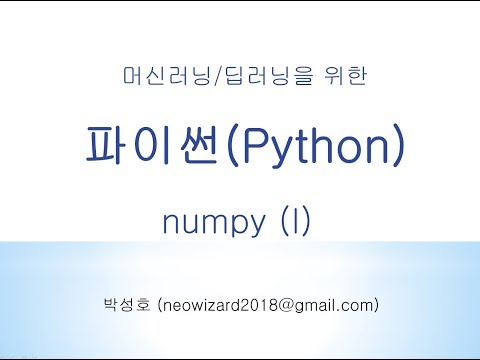

In [0]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('ku9-AxaznSA')  # numpy 기초 I

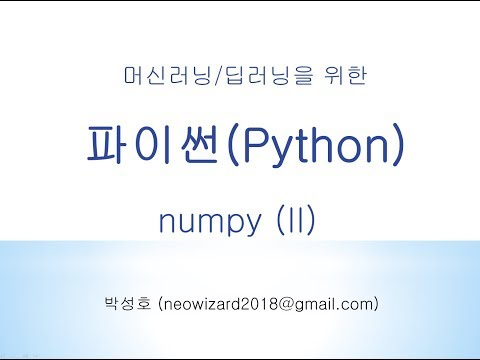

In [0]:
YouTubeVideo('dnJ3JESmBkE')  # numpy 기초 II

In [0]:
A= np.array([1,2,3])
B= np.array([4,5,6])

In [0]:
A-B,A*B,A/B,A%B,A//B,B//A

# 인덱스끼리 일치해서 뺄셈
# 맞춰서 나눠줌 # 강의에서 답이 이상해도 당황하지 말기 # 오류, 실수
# % 나머지
# //는 몫 # 정수부분만 가져와요

(array([-3, -3, -3]),
 array([ 4, 10, 18]),
 array([0.25, 0.4 , 0.5 ]),
 array([1, 2, 3]),
 array([0, 0, 0]),
 array([4, 2, 2]))

In [0]:
C= np.array([1,2,3])
D=C.reshape(1,3) 
# C랑 D랑 달라? 달라요 
# C, D를 찍어보니까 C는 1,2,3을 요소로 가진거고 D응 123를 하나의 요소로 가진거야(대괄호 두번)

#c        #d                                              
#0
#0        (0 0 0)   파이썬에서는 주로 세로 사용(c)
#0

In [54]:
C,D

(array([1, 2, 3]), array([[1, 2, 3]]))

In [0]:
C.shape,D.shape # 앞의 3은 행

((3,), (1, 3))

***